In [1]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E850-3B9A

 C:\Users\user\Downloads\MSAISchool_Folder\강의\2022년11월29일-통계기반데이터분석(6) 디렉터리

2022-11-29  오후 05:26    <DIR>          .
2022-11-29  오후 05:26    <DIR>          ..
2022-11-29  오후 05:26    <DIR>          .ipynb_checkpoints
2022-11-29  오후 04:51           341,198 2022년11월29일-통계기반데이터분석(6)-1(검정).ipynb
2022-11-29  오후 05:26           588,615 2022년11월29일-통계기반데이터분석(6)-2(선형회귀).ipynb
2022-11-29  오후 05:26               589 2022년11월29일-통계기반데이터분석(6)-3(k-means).ipynb
2022-11-29  오후 05:25            10,926 purchase.csv
               4개 파일             941,328 바이트
               3개 디렉터리  231,440,035,840 바이트 남음


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [25]:
purchase = pd.read_csv("purchase.csv")

In [26]:
purchase

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
x = purchase[['Age', 'EstimatedSalary']]

sc_purchase = StandardScaler()
x_sc = sc_purchase.fit_transform(x)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


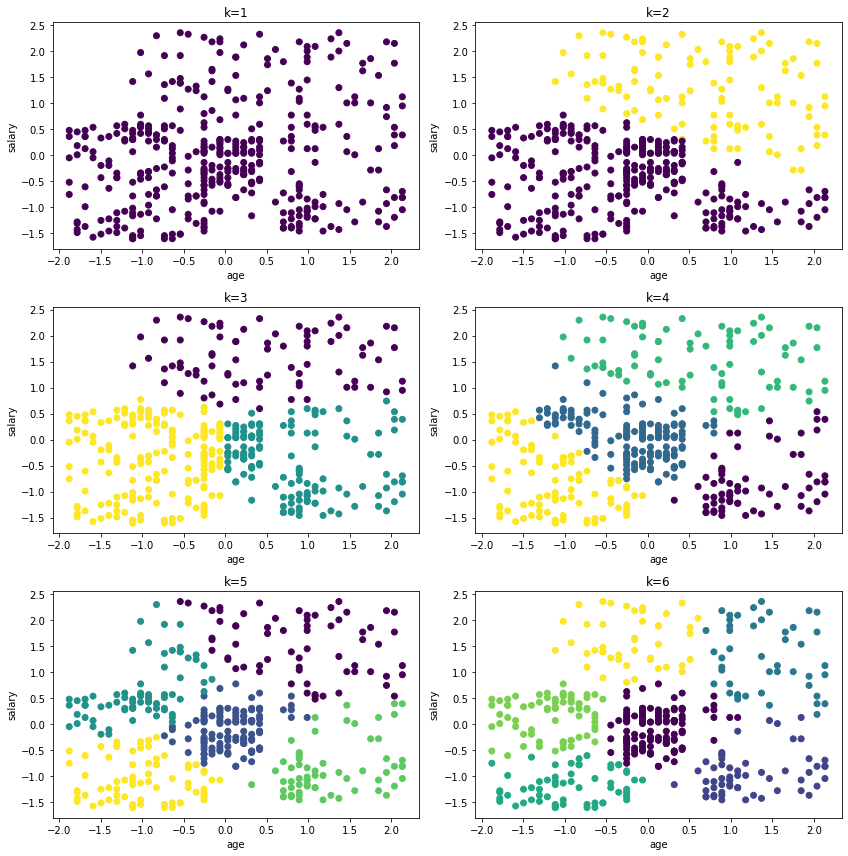

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for k in range(1,7):
  km = KMeans(n_clusters=k)
  km.fit(x_sc)
  ids = km.predict(x_sc)

  plt.subplot(3,2, k)
  plt.tight_layout()

  plt.title(f'k={k}')
  plt.xlabel('age')
  plt.ylabel('salary')

  plt.scatter(x_sc[:,0], x_sc[:,1], c=ids)

plt.show()


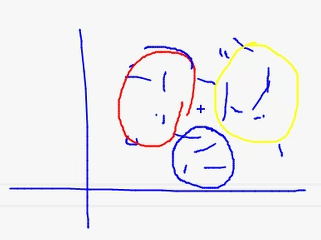

In [29]:
k=2
km_2 = KMeans(n_clusters=k)
km_2.fit(x_sc)

km_df_2 = purchase.copy()
ids = km_2.predict(x_sc)

km_df_2['cluster'] = ids
km_df_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0


In [30]:
km_df_2[km_df_2['Purchased'] != km_df_2['cluster']]

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
16,15733883,Male,47,25000,1,0
17,15617482,Male,45,26000,1,0
18,15704583,Male,46,28000,1,0
19,15621083,Female,48,29000,1,0
20,15649487,Male,45,22000,1,0
...,...,...,...,...,...,...
393,15635893,Male,60,42000,1,0
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,0


In [32]:
print(sum(km_df_2['Purchased'] == km_df_2['cluster'])/len(km_df_2)) # 클러스터와 같은 거를 다 합친 다음에 클러스터로 나눈다.

0.8225


# END